# Parameters

In [34]:
# Robotermaße
robot_width = 1
robot_length = 6

# Start- und Zielpunkt festlegen
start_point = (6, 1, 0)
goal_point = (10, 1, 0)
current_position=start_point

# Define Occupancy Grid

In [35]:
import numpy as np

def add_obstacle(occupancy_grid, width, length, x, y):
    width_occ_grid = len(occupancy_grid[0])
    height_occ_grid = len(occupancy_grid)

    start_row = y
    end_row = min(height_occ_grid, y + length)
    start_col = x
    end_col = min(width_occ_grid, x + width)

    for row in range(start_row, end_row):
        for col in range(start_col, end_col):
            occupancy_grid[row][col] = False

    return occupancy_grid

def generate_empty_occupancy_grid(size):
    empty_occupancy_grid = np.ones((size, size), dtype=bool)

    return empty_occupancy_grid

In [36]:
# Obstacles
occupancy_grid = generate_empty_occupancy_grid(18)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=8,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=2,
    x=8,
    y=11)

# Plot Occupancy Grid

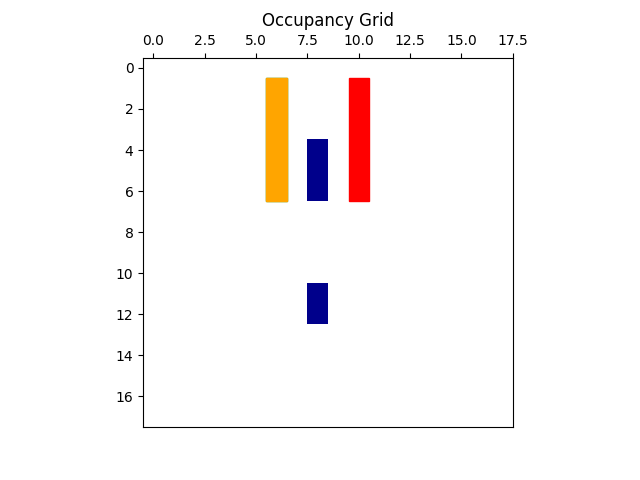

In [41]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_occupancy_grid(occupancy_grid, goal_point, plot_axis, current_position=None, path=[], robot_width=None, robot_length=None, active=True, plot_title="Occupancy Grid", y_axis_label=None, start_point=None):
    plot_axis.clear()

    if active:
        cmap = ListedColormap(['darkblue', 'white'])        
        start_color = 'green'
        goal_color = 'red'
        path_color = 'blue'
        current_color = 'orange'
    else:
        cmap = 'gray'
        start_color = 'black'
        goal_color = 'dimgray'
        path_color = 'darkgray'
        current_color = 'gray'
        line_color = 'black'

    plot_axis.imshow(occupancy_grid, cmap=cmap, interpolation='nearest', origin='upper')

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[start_y, start_x]:
                plot_axis.scatter(start_x, start_y, color=start_color, marker='x', label='Start Position')
            else:
                plot_axis.scatter(start_x, start_y, color=start_color, marker='o', label='Start Position')
        else: # Darstellung des aktuellen Roboters als Rechteck
            current_rect = plt.Rectangle(
                (start_x - 0.5, start_y - 0.5),
                robot_width,
                robot_length,
                rotation_point=(start_x, start_y),
                angle=start_rotation * -90,  # Rotation in Grad umrechnen
                color=start_color,
                label='Start Position'
            )
            plot_axis.add_patch(current_rect)


    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[goal_y, goal_x]:
                plot_axis.scatter(goal_x, goal_y, color=goal_color, marker='x', label='Goal Position')
            else:
                plot_axis.scatter(goal_x, goal_y, color=goal_color, marker='o', label='Goal Position')
        else: # Darstellung des aktuellen Roboters als Rechteck
            current_rect = plt.Rectangle(
                (goal_x - 0.5, goal_y - 0.5),
                robot_width,
                robot_length,
                rotation_point=(goal_x, goal_y),
                angle=goal_rotation * -90,  # Rotation in Grad umrechnen
                color=goal_color,
                label='Start Position'
            )
            plot_axis.add_patch(current_rect)

    plot_axis.plot([p[0] for p in path], [p[1] for p in path], color=path_color, label='Chosen Path')

    if current_position is not None:
        current_x, current_y, current_rotation = current_position
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[current_y, current_x]:
                plot_axis.scatter(current_x, current_y, color=current_color, marker='x', label='Current Position')
            else:
                plot_axis.scatter(current_x, current_y, color=current_color, marker='o', label='Current Position')
                # Darstellung des aktuellen Roboters als Rechteck
        else:
            current_rect = plt.Rectangle(
                (current_x - 0.5, current_y - 0.5),
                robot_width,
                robot_length,
                rotation_point=(current_x, current_y),
                angle=current_rotation * -90,  # Rotation in Grad umrechnen
                color=current_color,
                label='Current Position'
            )
            plot_axis.add_patch(current_rect)

    plot_axis.grid(False)
    plot_axis.set_title(plot_title)

    # Beschriftung der X-Achse oben
    plot_axis.xaxis.tick_top()

    if y_axis_label is not None:
        # Optionale Beschriftung Y-Achse
        plot_axis.text(-0.15, 0.5, y_axis_label, rotation='horizontal', va='center', ha='right', transform=plot_axis.transAxes)


fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    start_point=start_point)
plt.show()

# Compute Computational Spaces

In [105]:
def compute_cs_0deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - (robot_length - 1))
                end_row = min(height, row + 1)
                start_col = max(0, col - (robot_width - 1))
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle Zeilen bis height-robot_length auf False setzen
    for row in range(height - robot_length + 1, height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle Spalten bis width-robot_width auf False setzen
    for col in range(width - robot_width + 1, width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_90deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_width)
                start_col = max(0, col - robot_length + 1)
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_width-1) Zeilen auf False setzen
    for row in range(robot_width - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle rechten (robot_length-1) Spalten auf False setzen
    for col in range((width - robot_length + 1), width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_180deg(occupancy_grid, robot_width, robot_length):
    width = len(occupancy_grid[0])
    height = len(occupancy_grid)

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_length)
                start_col = col
                end_col = min(width, col + robot_width)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_length-1) Zeilen auf False setzen
    for row in range(robot_length - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_width-1) Spalten auf False setzen
    for col in range(robot_width - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space



def compute_cs_270deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - robot_width + 1)
                end_row = min(height, row + 1)
                start_col = col
                end_col = min(width, col + robot_length)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle unteren (robot_width-1) Zeilen auf False setzen
    for row in range((height - robot_width + 1), height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_length-1) Spalten auf False setzen
    for col in range(robot_length - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space

In [106]:
computational_space_list = []
computational_space_list.append(compute_cs_0deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space_list.append(compute_cs_90deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space_list.append(compute_cs_180deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space_list.append(compute_cs_270deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space = np.array(computational_space_list)

# Plot Computational Spaces

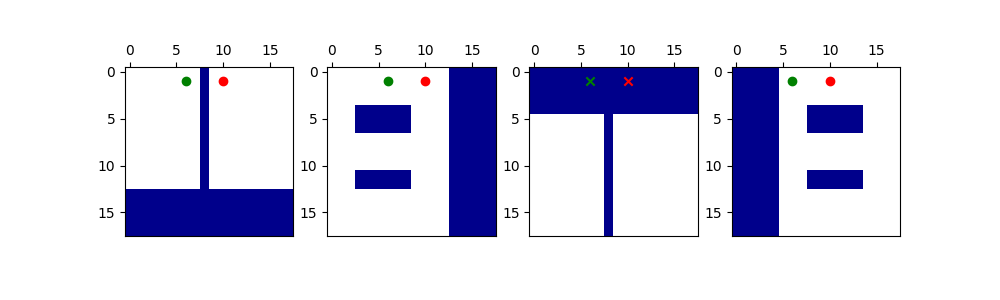

In [107]:
%matplotlib widget
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 3))
for rotation in range(4):      
    ax_occupancy_grid = fig.add_subplot(1, 4, rotation+1)
    plot_occupancy_grid(
        occupancy_grid=computational_space[rotation], 
        goal_point=goal_point, 
        plot_axis=ax_occupancy_grid, 
        start_point=start_point,
        plot_title="")
    
plt.show()


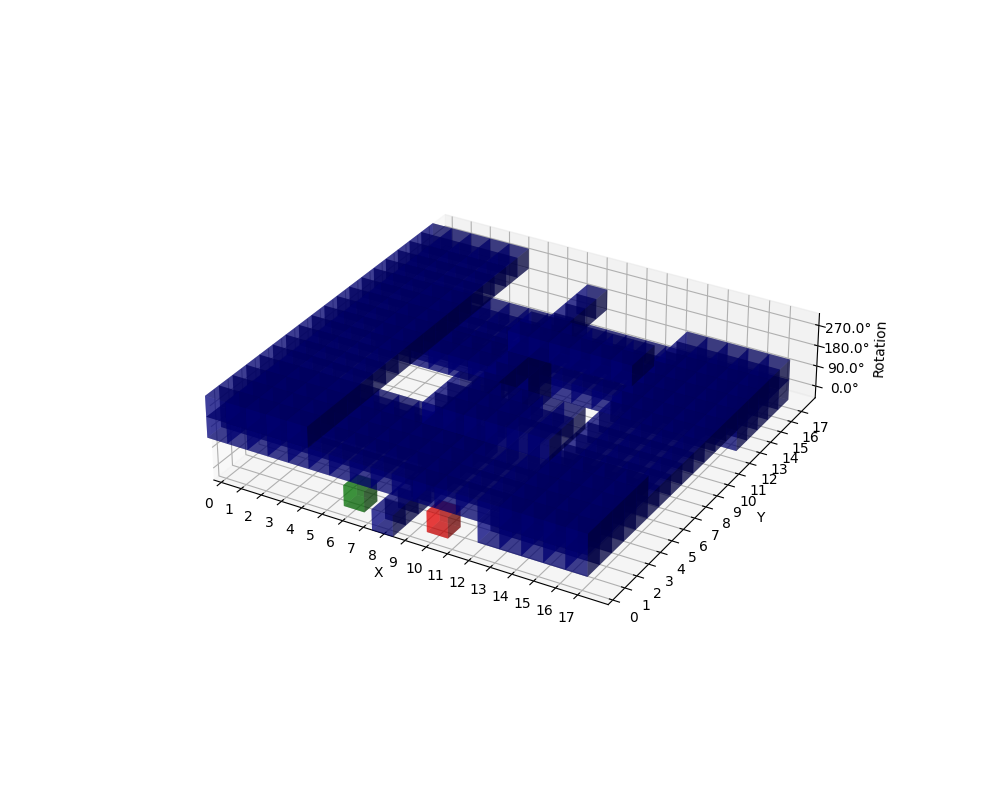

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_computational_space_3d(computational_space, ax, start_point=None, goal_point=None):
    rotation, size_y, size_x = computational_space.shape

    obstacle_color = 'darkblue'
    start_color = 'green'
    goal_color = 'red'

    for r in range(rotation):
        for y in range(size_y):
            for x in range(size_x):
                if not computational_space[r, y, x]:
                    # Plotte einen Würfel mit gleichen Abmessungen in allen Richtungen
                    ax.bar3d(x - 0.5, y - 0.5, r, 1, 1, 1, color=obstacle_color, alpha=0.5)

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        # Plotte einen Würfel für den Startpunkt
        ax.bar3d(start_x - 0.5, start_y - 0.5, start_rotation, 1, 1, 1, color=start_color, alpha=0.5)

    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        # Plotte einen Würfel für den Zielpunkt
        ax.bar3d(goal_x - 0.5, goal_y - 0.5, goal_rotation, 1, 1, 1, color=goal_color, alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')

    # Invertiere die Y-Achse
    ax.invert_yaxis()

    # Passe die Skalierung der Z-Achse manuell an
    ax.set_xlim(0, size_x)
    ax.set_ylim(0, size_y)
    ax.set_zlim(0, rotation)

    # Passe die Z-Koordinaten an, um die Würfel über der XY-Ebene zu positionieren
    ax.set_box_aspect([size_x / rotation, size_y / rotation, 1])

    # Passe die Position der Z-Ticks an
    ax.set_zticks(np.arange(0, rotation, 1) + 0.5)
    ax.set_zticklabels([f'{angle}°' for angle in np.arange(0, 360, 360/rotation)])

    # Passe die Position der X- und Y-Ticks an
    ax.set_xticks(np.arange(0, size_x, 1))
    ax.set_yticks(np.arange(0, size_y, 1))

    #ax.set_zticklabels([f'{angle}°' for angle in [0, 90, 180, 270]])



fig = plt.figure(figsize=(10, 8))
plot_axis = fig.add_subplot(111, projection='3d')
plot_computational_space_3d(
    computational_space=computational_space, 
    goal_point=goal_point,
    start_point=start_point,
    ax=plot_axis)
plt.show()

# Compute Wavefront Potentials

(10, 1, 0)
total_potential.shape: (4, 18, 18)
current_position: (10, 1, 0)
total_potential.shape[0]: 4
total_potential.shape[1]: 18
total_potential.shape[2]: 18
current_rotation, current_y, current_x: 0, 1, 10


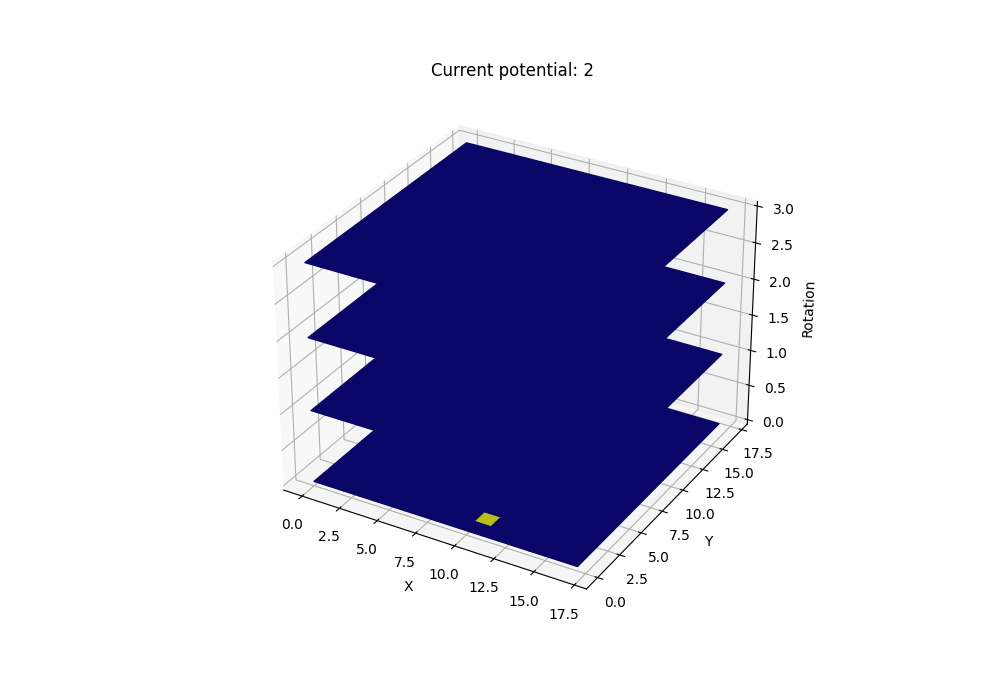

current_position: (0, 0, 10)
total_potential.shape[0]: 4
total_potential.shape[1]: 18
total_potential.shape[2]: 18
current_rotation, current_y, current_x: 10, 0, 0


IndexError: index 10 is out of bounds for axis 0 with size 4

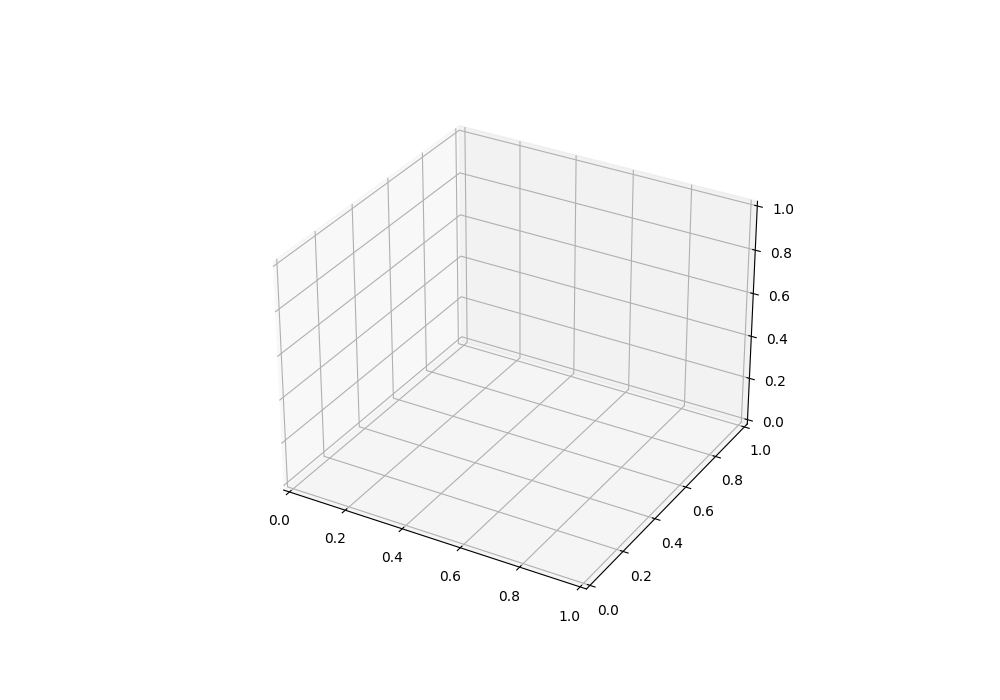

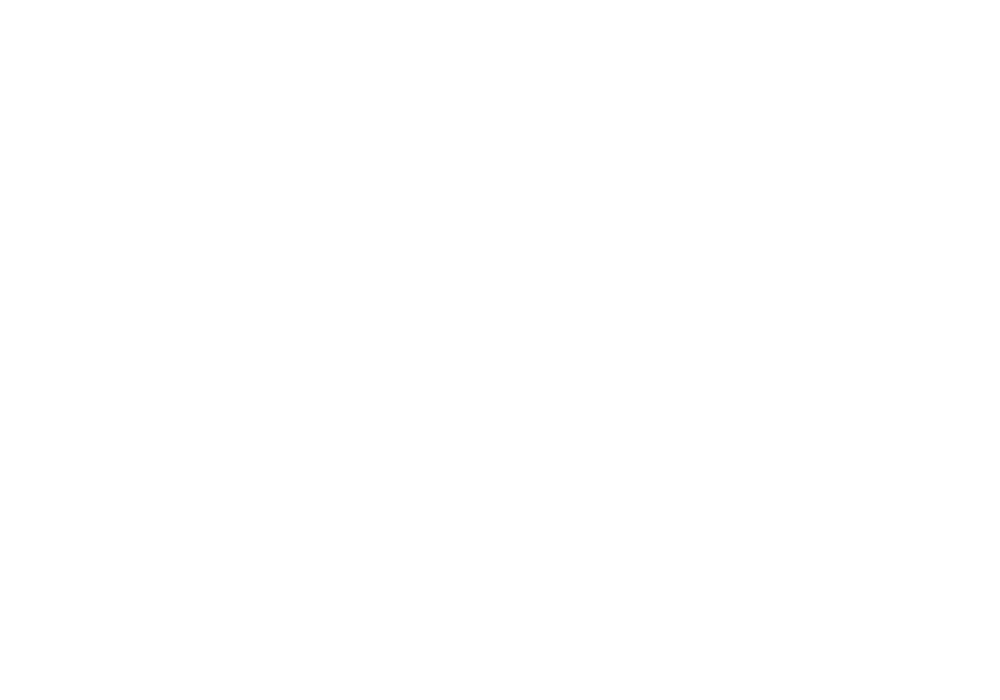

In [115]:
import numpy as np

def wavefront_recursive(cs_space, total_potential, current_position, potential, axis):
    rotation_size, size_y, size_x = cs_space.shape
    current_x, current_y, current_rotation = current_position
    print("current_rotation, current_y, current_x: " + str(current_rotation) + ", " + str(current_y) + ", " + str(current_x))
    print("current_position: " + str(current_position))


    # Setze das Potential für den aktuellen Punkt
    fig = plt.figure(figsize=(10, 7))

    print("total_potential.shape[0]: " + str(total_potential.shape[0]))
    print("total_potential.shape[1]: " + str(total_potential.shape[1]))
    print("total_potential.shape[2]: " + str(total_potential.shape[2]))

    total_potential[current_rotation, current_y, current_x] = potential
    visualize_3d_potential(total_potential/np.max(total_potential), "Current potential: " + str(potential), fig.add_subplot(111, projection='3d'))
    plt.show()
    
    # DFS Recursion for neighbours
    for dr, dy, dx in [(0, -1, 0), (0, 1, 0), (0, 0, 1), (0, 0, -1), (-1, 0, 0), (1, 0, 0)]:
        next_rotation = (current_rotation + dr) % rotation_size
        next_y, next_x = current_y + dy, current_x + dx

        # neighbour in xy-boundary? + not an obstacle? + not visited?
        if 0 <= next_y < size_y and 0 <= next_x < size_x and \
           cs_space[next_rotation, next_y, next_x] and \
           total_potential[next_rotation, next_y, next_x] == 0:

            wavefront_recursive(cs_space, total_potential, (next_rotation, next_y, next_x), potential + 1, axis)


def wavefront_algorithm(cs_space, goal, axis):
    goal_x, goal_y, goal_rotation = goal
    total_potential = np.zeros_like(cs_space, dtype=float) # initialize with 0s
    print("total_potential.shape: " + str(total_potential.shape))
    potential = 2
    total_potential[goal_rotation, goal_y, goal_x] = potential

    wavefront_recursive(
        cs_space=cs_space,
        total_potential=total_potential, 
        current_position=goal, 
        potential=potential, 
        axis=axis)

    potential = 2  # Startpotential (nach der Beschreibung)

    #max_potential = np.max(total_potential)

    '''
    # Durchlaufe den gesamten computational_space
    for r in range(rotation):
        for y in range(size_y):
            for x in range(size_x):
                # Überprüfe, ob der Punkt den Wert 0 hat
                if total_potential[r, y, x] == 0:
                    # Setze den Wert auf max_potential + 1
                    total_potential[r, y, x] = 1
    '''
    return total_potential

# Beispielaufruf
# cs_space = Beispiel für den 3D Computational Space
# goal = Zielkoordinaten (x, y)
# total_potential = wavefront_algorithm(cs_space, goal)


def update_obstacle_potential(cs_space, total_potential):
    rotation, size_y, size_x = cs_space.shape

    for r in range(rotation):
        for y in range(size_y):
            for x in range(size_x):
                if not cs_space[r, y, x]:
                    # Sammle die Potentiale der erreichbaren Nachbarn, die keine Hindernisse sind
                    neighbor_potentials = []
                    for dr in [-1, 0, 1]:
                        for dy in [-1, 0, 1]:
                            for dx in [-1, 0, 1]:
                                if (dr, dy, dx) != (0, 0, 0):
                                    new_r, new_y, new_x = (r + dr) % rotation, y + dy, x + dx
                                    if 0 <= new_y < size_y and 0 <= new_x < size_x and cs_space[new_r, new_y, new_x]:
                                        neighbor_potentials.append(total_potential[new_r, new_y, new_x])

                    # Setze das Potential für das aktuelle Hindernis auf das Maximum der erreichbaren Nachbarn
                    total_potential[r, y, x] = max(neighbor_potentials, default=0) + 1

    return total_potential



def hybrid_gradient(data, dx=1, dy=1, dz=1):
    """
    Compute the gradient of a 3D volume in the 3 directions, 2 nd order 
    in the interior of the non-nan object, 1 st order at the interface between
    the non-nan object and the surrounding nan values.

    :param data: the 3D volume to be derived (3D np.ndarray)
    :param dx: the spacing in the x direction (axis 0)
    :param dy: the spacing in the y direction (axis 1)
    :param dz: the spacing in the z direction (axis 2)

    :return: a tuple, the three gradients (in each direction) with the
    same shape as the input data
    """

    grad_x = (data[1:, ...] - data[:-1, ...]) / dx
    grad_y = (data[:, 1:, :] - data[:, :-1, :]) / dy
    grad_z = (data[..., 1:] - data[..., :-1]) / dz
    
    grad_x = np.nanmean([grad_x[1:], grad_x[:-1]], axis=0)
    grad_y = np.nanmean([grad_y[: ,1:, :], grad_y[:, :-1, :]], axis=0)
    grad_z = np.nanmean([grad_z[..., 1:], grad_z[..., :-1]], axis=0)


    return (
        np.pad(-grad_x, ((1, 1),  (0, 0), (0, 0)), constant_values=np.nan),
        np.pad(-grad_y, ((0, 0),  (1, 1), (0, 0)), constant_values=np.nan),
        np.pad(-grad_z, ((0, 0),  (0, 0), (1, 1)), constant_values=np.nan)
    )

def compute_gradients(computational_space):
    # Finde die Positionen der Hindernisse (np.nan)
    obstacle_positions = np.isnan(computational_space)

    # Berechne die Gradienten unter Berücksichtigung der Hindernisse
    gradient_z, gradient_y, gradient_x = np.gradient(computational_space)

    # Setze Gradienten für Hindernisse auf 0
    gradient_z[obstacle_positions] = 0
    gradient_y[obstacle_positions] = 0
    gradient_x[obstacle_positions] = 0


       
    # Die negierten Gradienten repräsentieren die Kräfte
    force_field_x = -gradient_x
    force_field_y = -gradient_y
    
    # Berücksichtige "wrap-around" in Z-Richtung
    force_field_rotation = gradient_z

    return force_field_x, force_field_y, force_field_rotation

print(goal_point)

fig = plt.figure(figsize=(10, 7))
#plt.show()
total_potential = wavefront_algorithm(
    cs_space=computational_space, 
    goal=goal_point, 
    axis=fig.add_subplot(111, projection='3d'))
#total_potential = update_obstacle_potential(computational_space, total_potential)
total_potential[~computational_space] = np.nan
force_field_x, force_field_y, force_field_rotation = compute_gradients(total_potential)

total_potential = np.nan_to_num(total_potential)
force_field_x = np.nan_to_num(force_field_x)
force_field_y = np.nan_to_num(force_field_y)
force_field_rotation = np.nan_to_num(force_field_rotation)

# Plot Wavefront Potential

NameError: name 'total_potential' is not defined

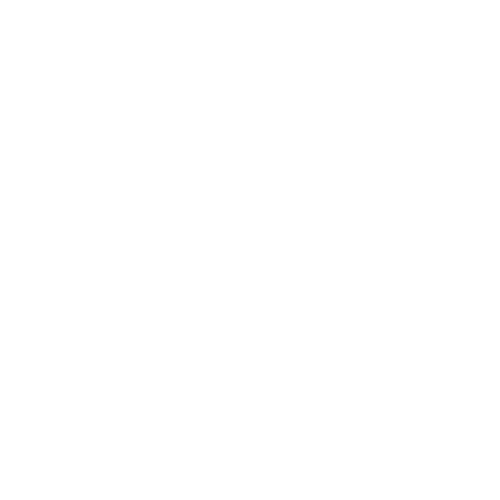

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_potential(potential, title, ax):
    rotation, size_y, size_x = potential.shape

    # Erzeuge ein Gitter im 3D-Raum
    x = np.arange(size_x)
    y = np.arange(size_y)
    X, Y = np.meshgrid(x, y)

    # Plotte die 3D-imshow für jede Rotationsebene
    for r in range(rotation):
        Z = np.full_like(X, r)  # Z-Koordinate auf Höhe der Rotationsebene
        ax.plot_surface(X, Y, Z, facecolors=plt.cm.plasma(potential[r, :, :]), rstride=1, cstride=1, alpha=1, antialiased=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')
    ax.set_title(title)
    #ax.invert_yaxis()

fig = plt.figure(figsize=(5, 5))
visualize_3d_potential(total_potential/np.max(total_potential), 'Total Potential', fig.add_subplot(111, projection='3d'))
plt.show()

'''
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=3,
    length=1,
    x=2,
    y=3)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=7,
    y=7)
'''

# Plot Force Vectors

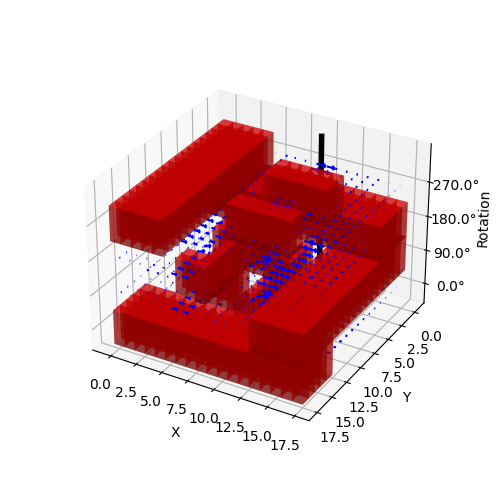

-1.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_space_and_forces(computational_space, force_field_x, force_field_y, force_field_rotation, ax, start_point=None, goal_point=None):
    rotation, size_y, size_x = computational_space.shape

    obstacle_color = 'darkblue'
    start_color = 'green'
    goal_color = 'red'

    max_force = np.max(np.sqrt(force_field_x**2 + force_field_y**2 + force_field_rotation**2))

    for r in range(rotation):
        for y in range(size_y):
            for x in range(size_x):
                if not computational_space[r, y, x]:
                    # Plotte einen Würfel mit gleichen Abmessungen in allen Richtungen
                    ax.bar3d(x - 0.5, y - 0.5, r, 1, 1, 1, color=obstacle_color, alpha=0.5)
                else:
                    # Berechne die Länge des Kraftvektors für diesen Punkt
                    force_length = np.sqrt(force_field_x[r, y, x]**2 + force_field_y[r, y, x]**2 + force_field_rotation[r, y, x]**2)

                    # Normalisiere den Kraftvektor auf den Bereich [0, 1]
                    length = force_length / max_force if max_force != 0 else 0

                    plot_axis.quiver(x - 0.5, y - 0.5, r, force_field_x[r, y, x], force_field_y[r, y, x], force_field_rotation[r, y, x],
                            color='blue', length=length, normalize=True)

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        # Plotte einen Würfel für den Startpunkt
        ax.bar3d(start_x - 0.5, start_y - 0.5, start_rotation, 1, 1, 1, color=start_color, alpha=0.5)

    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        # Plotte einen Würfel für den Zielpunkt
        ax.bar3d(goal_x - 0.5, goal_y - 0.5, goal_rotation, 1, 1, 1, color=goal_color, alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')

    # Invertiere die Y-Achse
    ax.invert_yaxis()

    # Passe die Skalierung der Z-Achse manuell an
    ax.set_xlim(0, size_x)
    ax.set_ylim(0, size_y)
    ax.set_zlim(0, rotation)

    # Passe die Z-Koordinaten an, um die Würfel über der XY-Ebene zu positionieren
    ax.set_box_aspect([size_x / rotation, size_y / rotation, 1])

    # Passe die Position der Z-Ticks an
    ax.set_zticks(np.arange(0, rotation, 1) + 0.5)
    ax.set_zticklabels([f'{angle}°' for angle in np.arange(0, 360, 360/rotation)])

    # Passe die Position der X- und Y-Ticks an
    ax.set_xticks(np.arange(0, size_x, 1))
    ax.set_yticks(np.arange(0, size_y, 1))

    #ax.set_zticklabels([f'{angle}°' for angle in [0, 90, 180, 270]])

fig = plt.figure(figsize=(5, 5))
plot_axis = fig.add_subplot(111, projection='3d')
visualize_space_and_forces(
    computational_space=computational_space, 
    force_field_x=force_field_x, 
    force_field_y=force_field_y, 
    force_field_rotation=force_field_rotation, 
    goal_point=goal_point, 
    ax=plot_axis)
plt.show()

print(np.min(force_field_rotation))

# Gradient Descent Step

In [ ]:
def gradient_descent(current_position, force_field_x, force_field_y, force_field_rotation):
    x, y, rotation = current_position

    force_x = force_field_x[rotation, y, x]
    force_y = force_field_y[rotation, y, x]
    force_rotation = force_field_rotation[rotation, y, x]

    print("Force_x: " + str(abs(force_x)))
    print("Force_y: " + str(abs(force_y)))
    print("Force_rotation: " + str(abs(force_rotation)))

    if abs(force_x) > abs(force_y) and abs(force_x) > abs(force_rotation):
        new_x = x + 1 if force_x > 0 else x - 1
        return (new_x, y, rotation)
    elif abs(force_y) > abs(force_x) and abs(force_y) > abs(force_rotation):
        new_y = y + 1 if force_y > 0 else y - 1
        return (x, new_y, rotation)
    else:
        new_rotation = (rotation + 1) % len(force_field_rotation)
        if force_rotation < 0:
            new_rotation = (rotation - 1) % len(force_field_rotation)
        return (x, y, new_rotation)

# Visualize

(6, 1, 0)


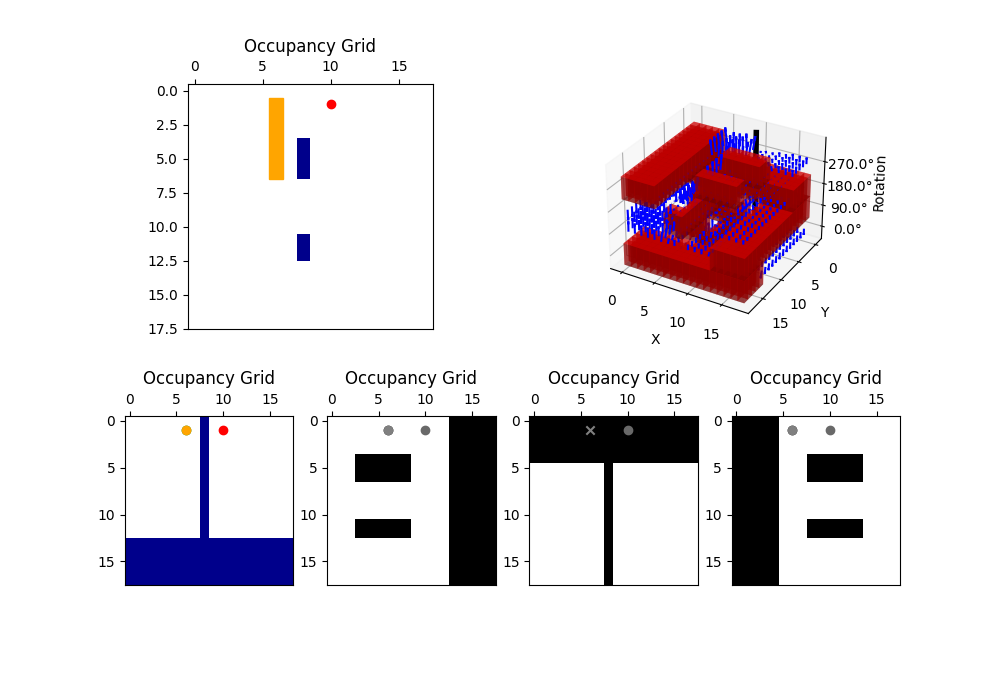

Force_x: 38.0
Force_y: 3.0
Force_rotation: 1.0
(7, 1, 0)
Force_x: 223.0
Force_y: 3.0
Force_rotation: 1.0
(8, 1, 0)


In [ ]:
fig = plt.figure(figsize=(10, 7))

ax_occupancy_grid = fig.add_subplot(2, 4, (1,2))
ax_cs_3D_force_vetors = fig.add_subplot(2, 4, (3,4), projection='3d')

ax_cs_2D = [fig.add_subplot(2, 4, 5), fig.add_subplot(2, 4, 6), fig.add_subplot(2, 4, 7), fig.add_subplot(2, 4, 8)]

def on_key(event):
    global current_position, path
    current_position = gradient_descent(
                        current_position=current_position,
                        force_field_x=force_field_x,
                        force_field_y=force_field_y,
                        force_field_rotation=force_field_rotation)  
    print(current_position)
    visualize_space_and_forces(computational_space, force_field_x, force_field_y, force_field_rotation, goal_point, ax_cs_3D_force_vetors)
    plot_occupancy_grid(
        occupancy_grid=occupancy_grid,
        start_point=start_point,
        goal_point=goal_point,
        current_position=current_position,
        robot_width=robot_width,
        robot_length=robot_length,
        plot_axis=ax_occupancy_grid
    )
    for rotation in range(4):
        
        plot_occupancy_grid(
            occupancy_grid=computational_space[rotation],
            start_point=start_point,
            goal_point=goal_point,
            current_position=current_position,
            plot_axis=ax_cs_2D[rotation],
            active = current_position[2] == rotation
    )

    # path.append(tuple(current_position))
    plt.draw()
    

visualize_space_and_forces(computational_space, force_field_x, force_field_y, force_field_rotation, goal_point, ax_cs_3D_force_vetors)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid,
    start_point=start_point,
    goal_point=goal_point,
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    plot_axis=ax_occupancy_grid
)
for rotation in range(4):
    plot_occupancy_grid(
    occupancy_grid=computational_space[rotation],
    start_point=start_point,
    goal_point=goal_point,
    current_position=current_position,
    plot_axis=ax_cs_2D[rotation],
    active = current_position[2] == rotation
)
print(current_position)


# Verbinde die Tasten mit der Funktion on_key
fig.canvas.mpl_connect('key_press_event', on_key)

plt.show()